In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Bike Share Data

The data contains an hourly breakdown of bike share rentals by both registered and "guest" users.  It also contains temperature and humidity data.

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset (I modified the dataset from here)

One interesting goal here would be to predict the number of passengers by the time/date and weather conditions.

In [2]:
dat = pd.read_csv("../data/bike-hour-raw.csv")

In [3]:
dat

,temp,hum,windspeed,casual,registered,cnt,dtetime
0,3.28,81.0,0.0000,3,13,16,2011-01-01 00:00:00
1,2.34,80.0,0.0000,8,32,40,2011-01-01 01:00:00
2,2.34,80.0,0.0000,5,27,32,2011-01-01 02:00:00
3,3.28,75.0,0.0000,3,10,13,2011-01-01 03:00:00
4,3.28,75.0,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...
17374,4.22,60.0,11.0014,11,108,119,2012-12-31 19:00:00
17375,4.22,60.0,11.0014,8,81,89,2012-12-31 20:00:00
17376,4.22,60.0,11.0014,7,83,90,2012-12-31 21:00:00
17377,4.22,56.0,8.9981,13,48,61,2012-12-31 22:00:00


# Feature Engineering

We previously looked at feature engineering for reasons of *necessity* (e.g. converting critical categorical labels to binary features).  Now we'll look at other methods of generating features. 

Firstly, let's convert the `dteday` field to a proper timestamp.  Notice that we wind up with a `datetime64[ns]` dtype.

In [4]:
dat.dtetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
17374    2012-12-31 19:00:00
17375    2012-12-31 20:00:00
17376    2012-12-31 21:00:00
17377    2012-12-31 22:00:00
17378    2012-12-31 23:00:00
Name: dtetime, Length: 17379, dtype: object

In [5]:
dat.dtetime = pd.to_datetime(dat.dtetime)
dat.dtetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: dtetime, Length: 17379, dtype: datetime64[ns]

Note that we could've done this when we first read in the csv:

In [6]:
pd.read_csv("../data/bike-hour-raw.csv", parse_dates=["dtetime"]).dtetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: dtetime, Length: 17379, dtype: datetime64[ns]

We can extract some different (simpler) numeric types, such as day-of-week, week-of-year, etc.

In [7]:
dat["dtime_hr"] = dat.dtetime.dt.hour
dat["dtime_day"] = dat.dtetime.dt.day
dat["dtime_dayofyear"] = dat.dtetime.dt.dayofyear
dat["dtime_week"] = dat.dtetime.dt.isocalendar().week
dat["dtime_month"] = dat.dtetime.dt.month
dat["dtime_year"] = dat.dtetime.dt.year
dat["dtime_quarter"] = dat.dtetime.dt.quarter
dat.index = dat["dtetime"]
dat = dat.drop(["dtetime"], axis=1)

In [8]:
dat

,temp,hum,windspeed,casual,registered,cnt,dtime_hr,dtime_day,dtime_dayofyear,dtime_week,dtime_month,dtime_year,dtime_quarter
dtetime,,,,,,,,,,,,,
2011-01-01 00:00:00,3.28,81.0,0.0000,3,13,16,0,1,1,52,1,2011,1
2011-01-01 01:00:00,2.34,80.0,0.0000,8,32,40,1,1,1,52,1,2011,1
2011-01-01 02:00:00,2.34,80.0,0.0000,5,27,32,2,1,1,52,1,2011,1
2011-01-01 03:00:00,3.28,75.0,0.0000,3,10,13,3,1,1,52,1,2011,1
2011-01-01 04:00:00,3.28,75.0,0.0000,0,1,1,4,1,1,52,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,4.22,60.0,11.0014,11,108,119,19,31,366,1,12,2012,4
2012-12-31 20:00:00,4.22,60.0,11.0014,8,81,89,20,31,366,1,12,2012,4
2012-12-31 21:00:00,4.22,60.0,11.0014,7,83,90,21,31,366,1,12,2012,4


# Custom Feature Engineering

Extracting date time components, or creating one-hot features are considered "standard" feature engineering... essential for extracting information from otherwise marginal or useless data.

In some cases, we may have additional contextual knowledge about the circumstances of the data.  For instance, we may know that temperature is not a perfect proxy for how hot or cold the temperature is *perceived*.  Let's try to adapt and use the "feels like" temperature rating that is commonly used on the weather channel.

In [9]:
from meteocalc import Temp, feels_like

# each individual row-wise record is a named tuple (tup)
def temp_adjust(tup): 
    # meteocalc expects temperatures in Fahrenheit. We can convert with Temp()
    # we also need to pass the humidity and windspeed
    
    atemp = feels_like(Temp(tup.temp,'c'), tup.hum, tup.windspeed)
    tup["atemp"] = atemp.c
    return tup
    
dat = dat.apply(temp_adjust, axis=1) # apply row-wise with axis=1

<AxesSubplot:xlabel='dtetime'>

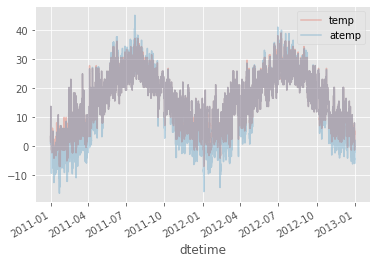

In [10]:
dat[["temp","atemp"]].plot(alpha=.3) # use an alpha since they overlap slightly

# Check for missing values

Looks like there aren't any in this data:

In [11]:
dat.isna().sum()

temp               0
hum                0
windspeed          0
casual             0
registered         0
cnt                0
dtime_hr           0
dtime_day          0
dtime_dayofyear    0
dtime_week         0
dtime_month        0
dtime_year         0
dtime_quarter      0
atemp              0
dtype: int64

# Feature Selection


We know that our target is the passenger count, so we can set some initial configuration

## Normalizing Features

Since we're dealing with features on many different scales, it's helpful to normalize them to standard ranges (0-1, or z-scaling also will work)

For instance, our critical measure of adjusted temperature values is on a much different scale than our passenger counts:

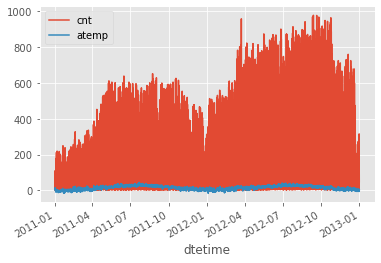

In [12]:
dat[["cnt", "atemp"]].plot();

Once again, we can use describe to get an idea of the statistical overview of the fields

In [13]:
dat.describe()

,temp,hum,windspeed,casual,registered,cnt,dtime_hr,dtime_day,dtime_dayofyear,dtime_week,dtime_month,dtime_year,dtime_quarter,atemp
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,15.358397,62.722884,12.736540,35.676218,153.786869,189.463088,11.546752,15.683411,183.738017,26.601933,6.537775,2011.502561,2.512055,14.276556
std,9.050138,19.292983,8.196795,49.305030,151.357286,181.387599,6.914405,8.789373,105.175185,15.017005,3.438776,0.500008,1.114108,10.783781
min,-7.060000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2011.000000,1.000000,-16.316378
25%,7.980000,48.000000,7.001500,4.000000,34.000000,40.000000,6.000000,8.000000,93.000000,14.000000,4.000000,2011.000000,2.000000,5.027529
50%,15.500000,63.000000,12.998000,17.000000,115.000000,142.000000,12.000000,16.000000,184.000000,27.000000,7.000000,2012.000000,3.000000,15.500000
75%,23.020000,78.000000,16.997900,48.000000,220.000000,281.000000,18.000000,23.000000,275.000000,40.000000,10.000000,2012.000000,4.000000,23.020000
max,39.000000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,31.000000,366.000000,52.000000,12.000000,2012.000000,4.000000,45.089325


We can go with "minmax" normalization here.

In [14]:
from sklearn import preprocessing

mm = preprocessing.MinMaxScaler()
target = dat.cnt
train = dat.drop(["cnt","registered","casual"], axis=1)
mm.fit(train)
norm_train = pd.DataFrame(mm.transform(train.values), columns=train.columns, index=train.index)
norm_train

,temp,hum,windspeed,dtime_hr,dtime_day,dtime_dayofyear,dtime_week,dtime_month,dtime_year,dtime_quarter,atemp
dtetime,,,,,,,,,,,
2011-01-01 00:00:00,0.224490,0.81,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.319130
2011-01-01 01:00:00,0.204082,0.80,0.000000,0.043478,0.0,0.0,1.0,0.0,0.0,0.0,0.303822
2011-01-01 02:00:00,0.204082,0.80,0.000000,0.086957,0.0,0.0,1.0,0.0,0.0,0.0,0.303822
2011-01-01 03:00:00,0.224490,0.75,0.000000,0.130435,0.0,0.0,1.0,0.0,0.0,0.0,0.319130
2011-01-01 04:00:00,0.224490,0.75,0.000000,0.173913,0.0,0.0,1.0,0.0,0.0,0.0,0.319130
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.244898,0.60,0.193018,0.826087,1.0,1.0,0.0,1.0,1.0,1.0,0.272257
2012-12-31 20:00:00,0.244898,0.60,0.193018,0.869565,1.0,1.0,0.0,1.0,1.0,1.0,0.272257
2012-12-31 21:00:00,0.244898,0.60,0.193018,0.913043,1.0,1.0,0.0,1.0,1.0,1.0,0.272257


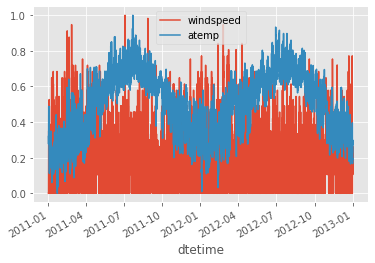

In [15]:
norm_train[["windspeed", "atemp"]].plot();

Let's just focus on building a model based on the weather-based features, just as a way to compare their predictive power.

In [16]:
import numpy as np
tdat = dat.drop(["casual",  "dtime_hr", "registered","cnt","dtime_day", "dtime_week","dtime_dayofyear", "dtime_month", "dtime_year", "dtime_quarter"], axis=1)

X = tdat.values
y = dat["cnt"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:>

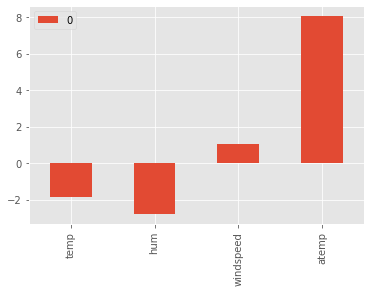

In [18]:
pd.DataFrame(model.coef_, index=tdat.columns).plot.bar()

It looks like the new `atemp` feature has a much larger score than its component parts.  It's probably a good idea to drop the components parts, and just use `atemp`.

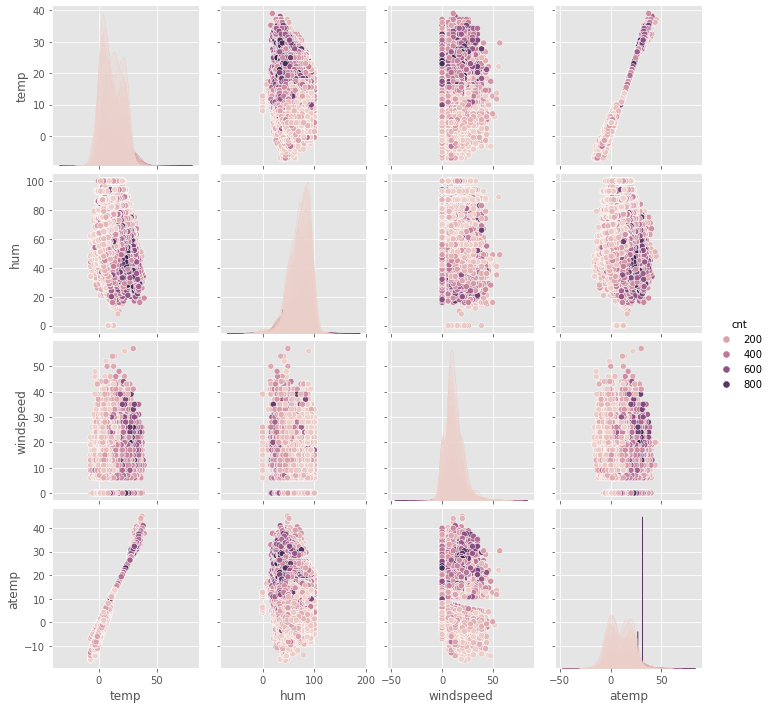

In [19]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(dat[["cnt", "temp", "hum", "windspeed", "atemp"]], hue="cnt");

# Chaining/Pipeline
Pipelines can be used as any other estimator, and they help avoid leadking test data into the training set.

You can construct a pipeline from a series of name/transform tuples.  E.g. `('scaler', MinMaxScaler)`.  These define the individual steps to run in sequence.

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

Pipeline([
    ('scaler', MinMaxScaler())
])

Pipeline(steps=[('scaler', MinMaxScaler())])

The result of a pipeline constructor lets you see the steps that comprise the pipeline.

You can use scaler transforms as-is, but if you do any feature transformations, you must implement an interface and add your code there.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):

    def __init__(self, feature_names, ts_index):
        self.feature_names = feature_names
        self.index = ts_index
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X = X.set_index(pd.to_datetime(X[self.index]))
        return X[self.feature_names]

Our feature selector will run over the "raw" data from the csv:

In [22]:
raw = pd.read_csv("../data/bike-hour-raw.csv")
FeatureSelector(["temp","hum","windspeed","cnt"], "dtetime").fit_transform(raw)

,temp,hum,windspeed,cnt
dtetime,,,,
2011-01-01 00:00:00,3.28,81.0,0.0000,16
2011-01-01 01:00:00,2.34,80.0,0.0000,40
2011-01-01 02:00:00,2.34,80.0,0.0000,32
2011-01-01 03:00:00,3.28,75.0,0.0000,13
2011-01-01 04:00:00,3.28,75.0,0.0000,1
...,...,...,...,...
2012-12-31 19:00:00,4.22,60.0,11.0014,119
2012-12-31 20:00:00,4.22,60.0,11.0014,89
2012-12-31 21:00:00,4.22,60.0,11.0014,90


Now we need a second phase that "expands" our features using the feature engineering techniques we discussed earlier.

In [23]:
class DateTimeExpander(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        dts = pd.Series(X.index).dt
        X["dts_month"] = dts.month.values
        X["dts_hour"] = dts.hour.values
        X["dts_day_of_week"] = dts.dayofweek.values
        
        return X

In [24]:
from meteocalc import Temp, feels_like


class FeelsLikeExpander(BaseEstimator, TransformerMixin):

    def __init__(self, temp_col, hum_col, windspeed_col, atemp_col):
        self.temp = temp_col
        self.hum = hum_col
        self.windspeed = windspeed_col
        self.atemp_col = atemp_col

    def fit(self, X, y=None):
        return self
    
    def temp_adjust(tup): 
            atemp = feels_like(Temp(tup[self.temp],'c'), tup[self.hum], tup[self.windspeed])
            tup[self.atemp_col] = atemp.c
            return tup 
        
    def transform(self,a X):
        X = X.apply(temp_adjust, axis=1)  
        X = X.drop(["temp","hum","windspeed"], axis=1)
        return X

In [25]:

class LagExpander(BaseEstimator, TransformerMixin):

    def __init__(self, lag_col):
        self.lag = lag_col

    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X[self.lag + "_lag1"] = X[self.lag].shift(1, fill_value=X.cnt[0])
        X[self.lag + "_lag24"] = X[self.lag].shift(24, fill_value=X.cnt[0])
        
        return X

In [26]:


class TargetDropper(BaseEstimator, TransformerMixin):

    def __init__(self, target_col):
        self.target = target_col

    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
#         import pdb; pdb.set_trace() # Here's how to enter the debugger in one line.  Don't forget to delete afterwards!
        return X.drop(self.target, axis=1)

Let's combine them all together inside a pipeline:

In [27]:
feat_pipe = Pipeline([
    ('feat_select', FeatureSelector(["temp","hum","windspeed","cnt"], "dtetime")),
    ('feat_dts', DateTimeExpander()),
    ('feat_feels',FeelsLikeExpander("temp","hum","windspeed","atemp")),
    ('feat_lag', LagExpander("cnt")),
    ('target_dropper', TargetDropper("cnt")),
])
feat = feat_pipe.fit_transform(raw)
feat

,dts_month,dts_hour,dts_day_of_week,atemp,cnt_lag1,cnt_lag24
dtetime,,,,,,
2011-01-01 00:00:00,1.0,0.0,5.0,3.280000,16.0,16.0
2011-01-01 01:00:00,1.0,1.0,5.0,2.340000,16.0,16.0
2011-01-01 02:00:00,1.0,2.0,5.0,2.340000,40.0,16.0
2011-01-01 03:00:00,1.0,3.0,5.0,3.280000,32.0,16.0
2011-01-01 04:00:00,1.0,4.0,5.0,3.280000,13.0,16.0
...,...,...,...,...,...,...
2012-12-31 19:00:00,12.0,19.0,0.0,0.401767,122.0,102.0
2012-12-31 20:00:00,12.0,20.0,0.0,0.401767,119.0,72.0
2012-12-31 21:00:00,12.0,21.0,0.0,0.401767,89.0,47.0


we can create a new training pipeline from the feature transformation pipeline.  Note that the pipeline steps are hierarchical now!

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = raw
y = raw.cnt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [29]:
train_pipe = Pipeline([
    ('feat_pipe', feat_pipe),
    ('scaler', MinMaxScaler()),
    ("regressor", regressor)
])
train_pipe

Pipeline(steps=[('feat_pipe',
                 Pipeline(steps=[('feat_select',
                                  FeatureSelector(feature_names=['temp', 'hum',
                                                                 'windspeed',
                                                                 'cnt'],
                                                  ts_index=None)),
                                 ('feat_dts', DateTimeExpander()),
                                 ('feat_feels',
                                  FeelsLikeExpander(atemp_col='atemp',
                                                    hum_col=None, temp_col=None,
                                                    windspeed_col=None)),
                                 ('feat_lag', LagExpander(lag_col=None)),
                                 ('target_dropper',
                                  TargetDropper(target_col=None))])),
                ('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

In [30]:
train_pipe.fit(X_train, y_train)

Pipeline(steps=[('feat_pipe',
                 Pipeline(steps=[('feat_select',
                                  FeatureSelector(feature_names=['temp', 'hum',
                                                                 'windspeed',
                                                                 'cnt'],
                                                  ts_index=None)),
                                 ('feat_dts', DateTimeExpander()),
                                 ('feat_feels',
                                  FeelsLikeExpander(atemp_col='atemp',
                                                    hum_col=None, temp_col=None,
                                                    windspeed_col=None)),
                                 ('feat_lag', LagExpander(lag_col=None)),
                                 ('target_dropper',
                                  TargetDropper(target_col=None))])),
                ('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

In [31]:
train_pipe.score(X_test, y_test)

0.280989813061867

Our model fit is lousy!  But, at least we have a composable pipeline now to investigate new features and model types.

In [32]:
train_pipe

Pipeline(steps=[('feat_pipe',
                 Pipeline(steps=[('feat_select',
                                  FeatureSelector(feature_names=['temp', 'hum',
                                                                 'windspeed',
                                                                 'cnt'],
                                                  ts_index=None)),
                                 ('feat_dts', DateTimeExpander()),
                                 ('feat_feels',
                                  FeelsLikeExpander(atemp_col='atemp',
                                                    hum_col=None, temp_col=None,
                                                    windspeed_col=None)),
                                 ('feat_lag', LagExpander(lag_col=None)),
                                 ('target_dropper',
                                  TargetDropper(target_col=None))])),
                ('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

In [33]:
train_pipe.named_steps["regressor"]

LinearRegression()

In [44]:
import joblib

In [45]:
joblib.dump(train_pipe, 'train_pipe.joblib')

['train_pipe.joblib']

In [47]:
! ls -lsh

total 3960
   8 -rw-r--r--  1 jdonaldson  staff   1.2K Feb  3 20:02 Example Notebooking.ipynb
   8 -rw-r--r--  1 jdonaldson  staff   1.5K Feb 18 13:43 Untitled.ipynb
1152 -rw-r--r--  1 jdonaldson  staff   573K Feb 17 17:41 Week 2 - Linear Regression.ipynb
 504 -rw-r--r--  1 jdonaldson  staff   250K Feb  3 14:41 Week 3 - Logistic Regression.ipynb
1240 -rw-r--r--  1 jdonaldson  staff   618K Feb 10 20:40 Week 4 - Data Preprocessing, Analysis, and Transformation.ipynb
  80 -rw-r--r--  1 jdonaldson  staff    39K Feb 17 16:49 Week 5 - Model Building Part 2 (Gen Data).ipynb
 928 -rw-r--r--  1 jdonaldson  staff   463K Mar  3 15:51 Week 5 and 6 - Model Building Part 2.ipynb
  16 -rw-r--r--  1 jdonaldson  staff   6.6K Mar  3 15:51 Week 7 - Deployment.ipynb
   0 drwxr-xr-x  3 jdonaldson  staff    96B Mar  3 15:42 __pycache__
   8 -rw-r--r--  1 jdonaldson  staff   2.1K Mar  3 15:52 pipeline.py
   8 -rw-r--r--  1 jdonaldson  staff   1.9K Mar  3 15:51 train_pipe.joblib
   8 -rw-r--r--  1 jdonaldson 

In [42]:
dir(FeatureSelector)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'fit',
 'fit_transform',
 'get_params',
 'set_params',
 'transform']